### Purpose of this notebook

Though it is not required in the requirements, it is easier to allow others to follow by giving a guidance of what the process of subsetting the hate.csv did. This notebook serve particularly to provide that guidance.

### Onboarding
We would use pandas to read the csv and perform the subset process.

In [1]:
import pandas as pd
original_hate = pd.read_csv("hate_crime.csv", low_memory=False)

In [105]:
original_hate.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [6]:
original_hate.shape

(201403, 28)

We could tell that the number of tuples in this dataset maybe too much for a browser to handle. Also, 28 columns means that some of the columns maybe irrelavant to our analysis.

Where, our focus of our analysis is shown below:
 - Explore the trend of frequency of hate crimes since 1991 (Line Plot, tooltip implemented for checking a value of a point)
 - Explore the types of hate crimes and race of offenders and victims that are most common (Stacked Bar
    Graph, selection of offenders and victims done by a radio button, use mouseover to highlight the area that the user's mouse is on)
 - Explore the average count of offenders aggregated by city against the average counts of victims aggregated by city(Scatterplot)
 - Explore the count of the juvenile offenders and the regions when they commit the hate crime (Box Plot)
 - Explore how the race of the persecutor of a hate crime relates to the race of the victim of a hate crime (Heatmap)
 - Explore where hate crimes occur in the United States in a state level(Choropleth, use mouseover to highlight the area that the user's mouse is on)
 
Thus, we would need data on 
 - count of hate crime, year of hate crime
 - victim race, offender race, type of hate crime
 - age for the victims
 - age of the offenders, sex of the offenders
 - race of the persecutor, and race of the victim
 - state of hate crime

Thus, we would need
 - VICTIM_COUNT, DATA_YEAR
 - OFFENDER_RACE, VICTIM_RACE, OFFENSE_TYPE
 - PUB_AGENCY_NAME, VICTIM_COUNT, TOTAL_OFFENDER_COUNT
 - REGION_NAME, JUVENILE_OFFENDER_COUNT
 - OFFENDER_RACE, VICTIM_RACE
 - STATE_NAME

In [10]:
original_hate.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [16]:
original_hate.VICTIM_COUNT.value_counts()

1      170319
2       22979
3        4562
4        1853
5         659
6         411
7         140
8         121
10        120
9          64
12         31
11         21
14         20
13         12
15         11
20         10
16          8
19          5
25          5
50          4
17          4
22          4
30          4
40          3
24          3
18          3
23          2
29          2
80          2
27          2
100         2
41          2
33          1
200         1
75          1
47          1
21          1
26          1
45          1
28          1
31          1
52          1
90          1
58          1
147         1
48          1
42          1
Name: VICTIM_COUNT, dtype: int64

<AxesSubplot:xlabel='VICTIM_COUNT', ylabel='TOTAL_OFFENDER_COUNT'>

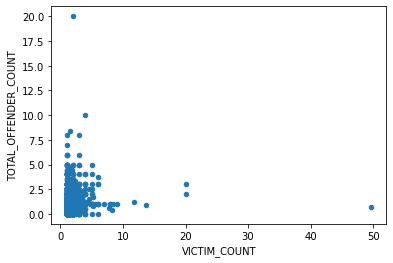

In [21]:
original_hate.groupby("PUB_AGENCY_NAME").mean().plot(kind="scatter", y="TOTAL_OFFENDER_COUNT", x = "VICTIM_COUNT")

<AxesSubplot:xlabel='VICTIM_COUNT', ylabel='TOTAL_OFFENDER_COUNT'>

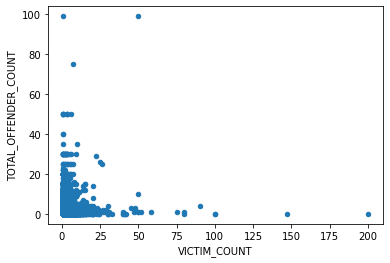

In [6]:
original_hate.plot.scatter(x="VICTIM_COUNT", y="TOTAL_OFFENDER_COUNT")

In [120]:
original_hate["JUVENILE_VICTIM_COUNT"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
201398    0.0
201399    0.0
201400    0.0
201401    0.0
201402    0.0
Name: JUVENILE_VICTIM_COUNT, Length: 201403, dtype: float64

In [17]:
hate_2020 = pd.read_csv("hate_crime_2020.csv", low_memory= False)

In [20]:
hate_2020.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [21]:
original_hate.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [25]:
original_hate['BIAS_DESC'].unique()

array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Anti-Arab', 'Anti-Protestant', 'Anti-Other Religion',
       'Anti-Islamic (Muslim)', 'Anti-Gay (Male)', 'Anti-Asian',
       'Anti-Catholic', 'Anti-Heterosexual', 'Anti-Hispanic or Latino',
       'Anti-Other Race/Ethnicity/Ancestry',
       'Anti-Multiple Religions, Group', 'Anti-Multiple Races, Group',
       'Anti-Lesbian (Female)',
       'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
       'Anti-American Indian or Alaska Native',
       'Anti-Gay (Male);Anti-White',
       'Anti-Black or African American;Anti-Jewish',
       'Anti-Black or African American;Anti-Lesbian (Female)',
       'Anti-Black or African American;Anti-Gay (Male)',
       'Anti-Black or African American;Anti-White',
       'Anti-Atheism/Agnosticism', 'Anti-Gay (Male);Anti-Jewish',
       'Anti-Bisexual', 'Anti-Hispanic or Latino;Anti-White',
       'Anti-Hispanic or Latino;Anti-Multiple Races, Group',
       'Anti-Ame

In [107]:
original_hate["Offense"] = original_hate['OFFENSE_NAME'].str.split(";").str[0].str.split(" ").str[-1]

In [113]:
first3offense = list(original_hate["Offense"].value_counts()[0:3].index)
original_hate["Offense"][(original_hate["Offense"] != first3offense[0]) & 
              (original_hate["Offense"] != first3offense[1]) & 
              (original_hate["Offense"] != first3offense[2])] = "Others"

/var/folders/51/64d5lv_53rx716ghj8z3q13c0000gn/T/ipykernel_12424/2012499392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_hate["Offense"][(original_hate["Offense"] != first3offense[0]) &


In [109]:
first3offense

['Property', 'Assault', 'Intimidation']

In [114]:
original_hate.Offense.value_counts()

Property        64768
Assault         60837
Intimidation    59771
Others          16027
Name: Offense, dtype: int64